# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Farhan Lucky Putra
- **Email:** muhammadfarhan.mf415@gmail.com // mc004d5y1230@student.devacademy.id 
- **ID Dicoding:** mfarhanlp // MC004D5Y1230

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda selama periode tertentu dengan faktor dari hari kerja / weekend dan cuaca serta musim?
- Bagaimana penggunaan sepeda berdasarkan jam dalam sehari, apakah ada "golden hour" peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [33]:
#Import Data Day
data_day = pd.read_csv("data/day.csv")
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [34]:
#Import Data Hour
data_hour = pd.read_csv("data/hour.csv")
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset `day.csv` atau data harian memiliki atribut berupa `instant`, `dteday`, `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`, `temp`, `atemp`, `hum`, `windspeed`, `casual`, `registered`, `cnt` yang bisa dipakai untuk analisis
- Dataset `hour.csv` atau data per jam memiliki atribut yang sama dengan tambahan `hr` didalamnya

### Assessing Data

In [35]:
# Menilai data_day
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [36]:
# Cek jumlah missing value data_day
data_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [37]:
# Mengecek duplikasi data data_day
data_day.duplicated().sum()

0

In [38]:
# Mengecek statistik data data_day
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [39]:
# Menilai data_hour
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [40]:
# Cek jumlah missing value data_hour
data_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [41]:
# Mengecek duplikasi data data_hour
data_hour.duplicated().sum()

0

In [42]:
# Mengecek statistik data data_hour
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada dataset `data_day` dan `data_hour` tidak ditemukan missing value
- Tidak ada data duplikat di masing - masing dataset
- `dteday` perlu dilakukan perubahan format dari `object` ke format `datetime`
- `season` dan `weathersit`dilakukan mapping kategori sesuai dengan file `Readme.txt` yang diberikan

### Cleaning Data

In [43]:
# Merubah `dteday` ke format datetime
data_day["dteday"] = pd.to_datetime(data_day["dteday"])
data_hour["dteday"] = pd.to_datetime(data_hour["dteday"])

In [44]:
# Mapping kategori `season` dan `weathersit`
data_day["season"] = data_day["season"].map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})
data_day["weathersit"] = data_day["weathersit"].map({1:"Clear", 2:"Mist + Cloudy", 3:"Light Snow", 4:"Heavy Rain"})

In [46]:
# Mapping kategori `season` dan `weathersit`
data_hour["season"] = data_hour["season"].map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})
data_hour["weathersit"] = data_hour["weathersit"].map({1:"Clear", 2:"Mist + Cloudy", 3:"Light Snow", 4:"Heavy Rain"})

In [47]:
# Cek hasil perubahan
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [48]:
# Cek hasil perubahan
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- `dteday` telah dirubah menjadi format datetime
- `season` dan `weathersit` telah dirubah dalam bentuk kategori
- Sudah tidak ada missing value dan duplikat data
- Dataset sudah siap untuk dilakukan eksplorasi dan visualisasi data

## Exploratory Data Analysis (EDA)

### Explore data untuk mengetahui distribusi dari setiap variabel

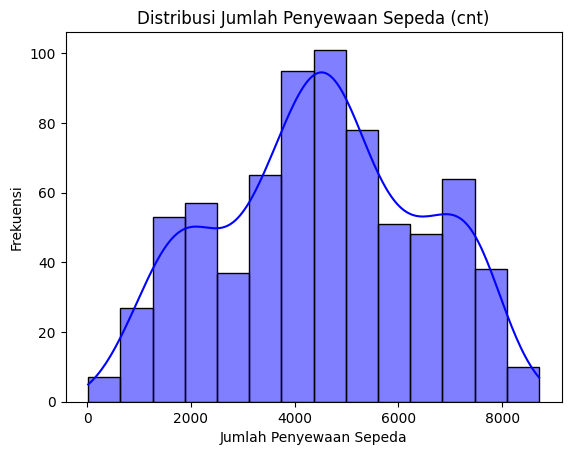

In [52]:
# Distribusi jumlah Penyewaan Sepeda (cnt)
sns.histplot(data_day["cnt"], kde = True, color='blue')
plt.title("Distribusi Jumlah Penyewaan Sepeda (cnt)")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14244\2766726071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_day["season"], palette="Blues")


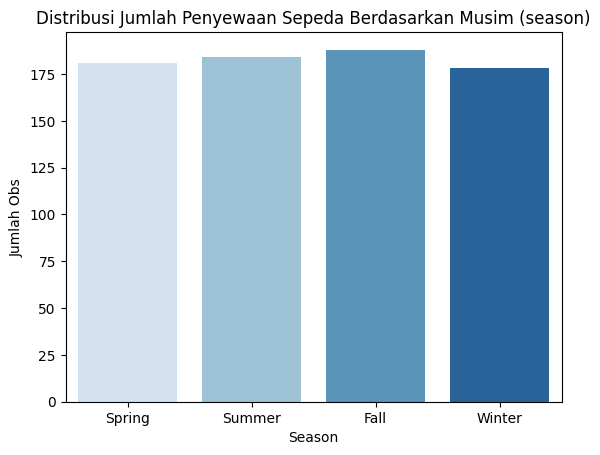

In [63]:
# Distribusi jumlah obs penyewaan sepeda berdasarkan musim
sns.countplot(x=data_day["season"], palette="Blues")
plt.title("Distribusi Jumlah Penyewaan Sepeda Berdasarkan Musim (season)")
plt.xlabel("Season")
plt.ylabel("Jumlah Obs")
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14244\402492479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_day["weathersit"], palette="BuGn")


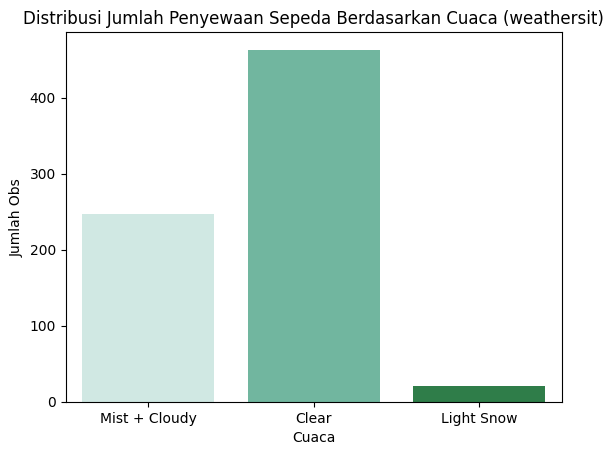

In [62]:
# Distribusi jumlah obs penyewaan sepeda berdasarkan cuaca
sns.countplot(x=data_day["weathersit"], palette="BuGn")
plt.title("Distribusi Jumlah Penyewaan Sepeda Berdasarkan Cuaca (weathersit)")
plt.xlabel("Cuaca")
plt.ylabel("Jumlah Obs")
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14244\2346816265.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_day["workingday"], palette="CMRmap")


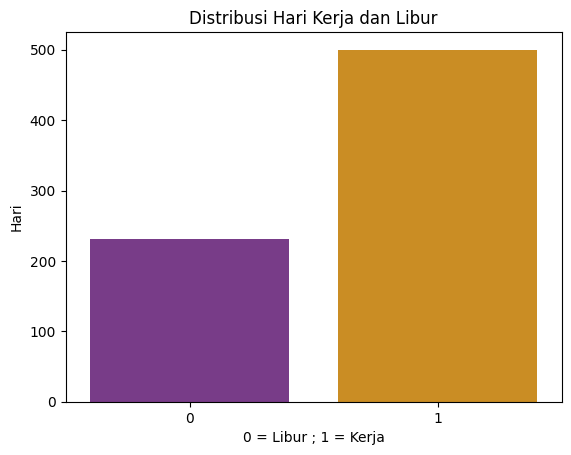

In [64]:
# Distribusi jumlah hari kerja
sns.countplot(x=data_day["workingday"], palette="CMRmap")
plt.title("Distribusi Hari Kerja dan Libur")
plt.xlabel("0 = Libur ; 1 = Kerja")
plt.ylabel("Hari")
plt.show()

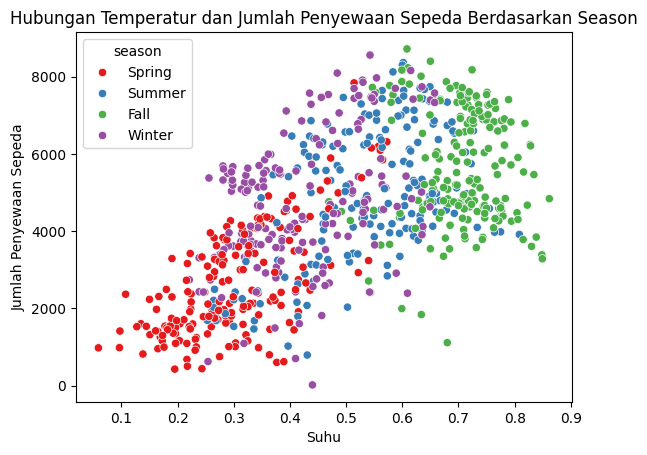

In [66]:
# Scatter Plot temp vs cnt berdasarkan season
sns.scatterplot(data=data_day, x="temp", y="cnt", hue="season", palette="Set1")
plt.title("Hubungan Temperatur dan Jumlah Penyewaan Sepeda Berdasarkan Season")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

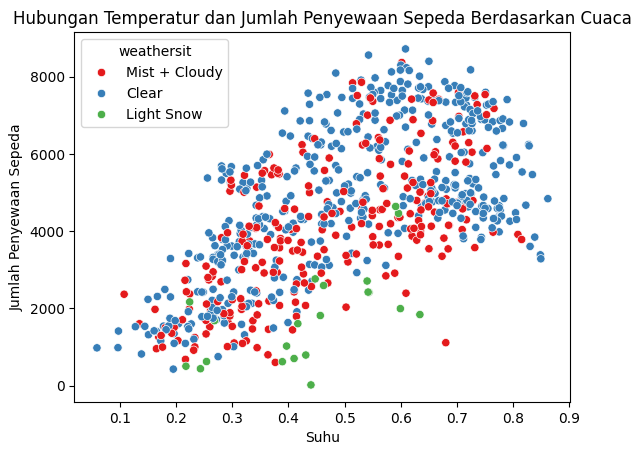

In [67]:
# Scatter Plot temp vs cnt berdasarkan weathersit
sns.scatterplot(data=data_day, x="temp", y="cnt", hue="weathersit", palette="Set1")
plt.title("Hubungan Temperatur dan Jumlah Penyewaan Sepeda Berdasarkan Cuaca")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

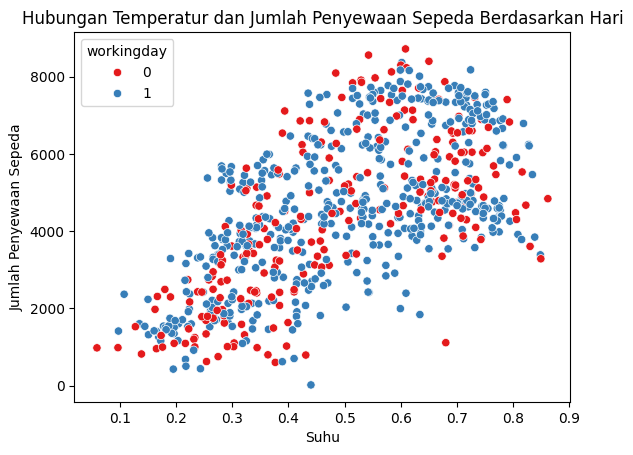

In [68]:
# Scatter Plot temp vs cnt berdasarkan Hari
sns.scatterplot(data=data_day, x="temp", y="cnt", hue="workingday", palette="Set1")
plt.title("Hubungan Temperatur dan Jumlah Penyewaan Sepeda Berdasarkan Hari")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

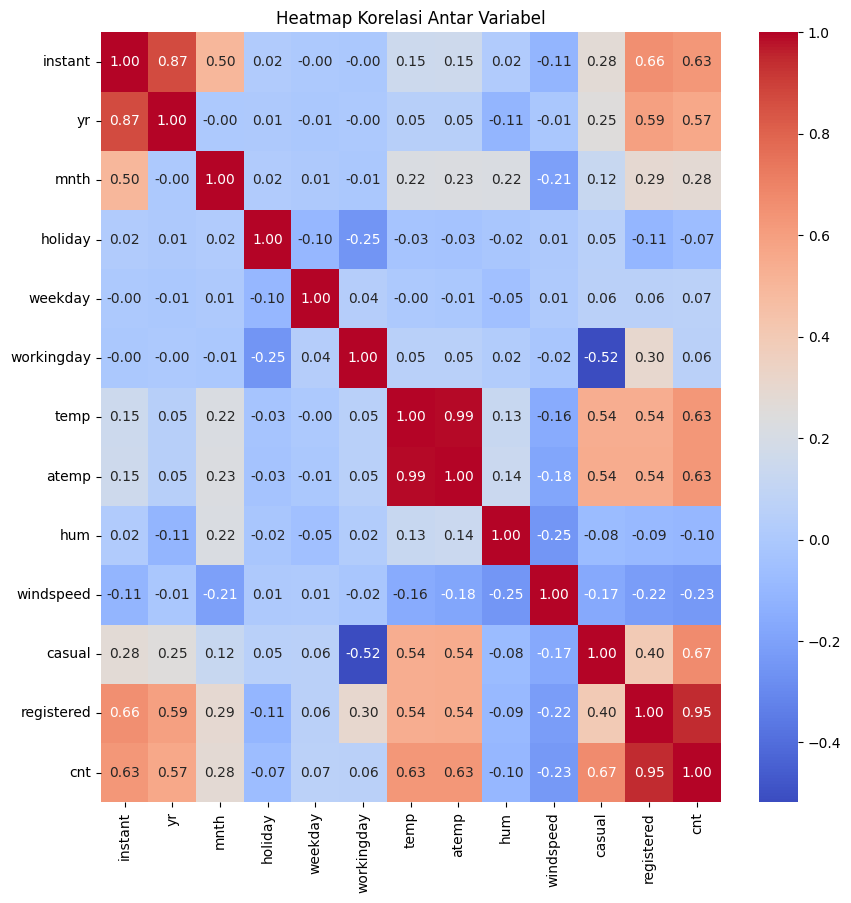

In [75]:
# Korelasi Antar Variabel
plt.figure(figsize=(10, 10))
numeric_cols = data_day.select_dtypes(include=['number'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

### Agregasi Data

In [76]:
# Menghitung rata - rata penyewaan sepeda berdasarkan season
agg_season = data_day.groupby("season")["cnt"].mean().reset_index()
agg_season

,season,cnt
0,Fall,5644.303191
1,Spring,2604.132597
2,Summer,4992.331522
3,Winter,4728.162921


In [93]:
# Menghitung rata - rata penyewaan sepeda berdasarkan season dan cuaca
agg_season_cuaca = data_day.groupby(["season", "weathersit"])["cnt"].mean().reset_index()
agg_season_cuaca

,season,weathersit,cnt
0,Fall,Clear,5878.257353
1,Fall,Light Snow,2751.750000
2,Fall,Mist + Cloudy,5222.479167
3,Spring,Clear,2811.135135
4,Spring,Light Snow,934.750000
5,Spring,Mist + Cloudy,2357.166667
6,Summer,Clear,5548.548673
7,Summer,Light Snow,1169.000000
8,Summer,Mist + Cloudy,4236.705882
9,Winter,Clear,5043.563107


In [79]:
# Menghitung rata - rata penyewaan sepeda berdasarkan cuaca
agg_cuaca = data_day.groupby("weathersit")["cnt"].mean().reset_index()
agg_cuaca

,weathersit,cnt
0,Clear,4876.786177
1,Light Snow,1803.285714
2,Mist + Cloudy,4035.862348


In [88]:
# Menghitung jumlah penyewaan sepeda berdasarkan hari kerja
agg_hari = data_day.groupby("workingday")["cnt"].sum().reset_index()
agg_hari

,workingday,cnt
0,0,1000269
1,1,2292410


In [87]:
# Menghitung rata - rata dan total penyewaan sepeda berdasarkan jam
agg_hour = data_hour.groupby("hr").agg({
    "cnt": ["mean","sum"]
}).reset_index()
agg_hour.columns = ["hr", "avg_cnt", "sum_cnt"]
agg_hour

,hr,avg_cnt,sum_cnt
0,0,53.898072,39130
1,1,33.375691,24164
2,2,22.869930,16352
3,3,11.727403,8174
4,4,6.352941,4428
5,5,19.889819,14261
6,6,76.044138,55132
7,7,212.064649,154171
8,8,359.011004,261001
9,9,219.309491,159438


In [84]:
# Menghitung jumlah penyewa yang sudah registrasi atau belum
agg_reg = data_day.groupby("mnth")[["casual","registered"]].sum().reset_index()
agg_reg

,mnth,casual,registered
0,1,12042,122891
1,2,14963,136389
2,3,44444,184476
3,4,60802,208292
4,5,75285,256401
5,6,73906,272436
6,7,78157,266791
7,8,72039,279155
8,9,70323,275668
9,10,59760,262592


**Insight:**
- Melihat dari `Heatmap` Variabel yang berpengaruh pada Jumlah Penyewaan Sepeda (cnt) :
    - `registered` (0.95) : Jumlah pengguna yang terdaftar.
    - `casual` (0.67) : Jumlah pengguna yang tidak terdaftar, namun jumlahnya jauh lebih kecil dari `registered`
    - `temp` (0.63) & `atemp` (0.63) : Faktor cuaca.
- Variabel diatas berperan meningkatkan Jumlah Penyewaan Sepeda (cnt)

- melihat dari `agregasi data` :
    - `season` memiliki pengaruh yang signifikan pada Jumlah Penyewaan Sepeda, hal ini menunjukkan jika musim - musim tertentu akan mempengaruhi dari penyewaan ini.
    - `weathersit` atau cuaca juga mempengaruhi dari penyewaan sepeda ini,.
    - `workingday` menunjukkan pengaruh yang sangat signifikan, melihat bahwa ketika hari kerja banyak orang yang melakukan penyewaan yang mungkin untuk perjalanan menuju tempat kerja.
    - `hr` menunjukkan ada beberapa jam yang meningkat, bisa disebabkan adanya `golden hour` pada keberangkatan dan kepulangan kerja.
    - `casual` dan `registered` menunjukkan lebih banyak orang yang sudah mendaftar sebelumnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda selama periode tertentu dengan faktor dari hari kerja / weekend dan cuaca serta musim?

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14244\453440081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'season', y = "cnt", data = data_day, palette = "Set2")


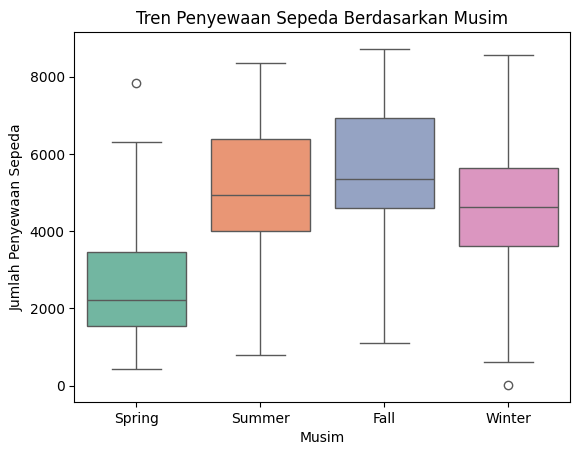

In [89]:
# Tren Pengaruh dari Musim
sns.boxplot(x = 'season', y = "cnt", data = data_day, palette = "Set2")
plt.title("Tren Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14244\470033382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'weathersit', y = "cnt", data = data_day, palette = "Set2")


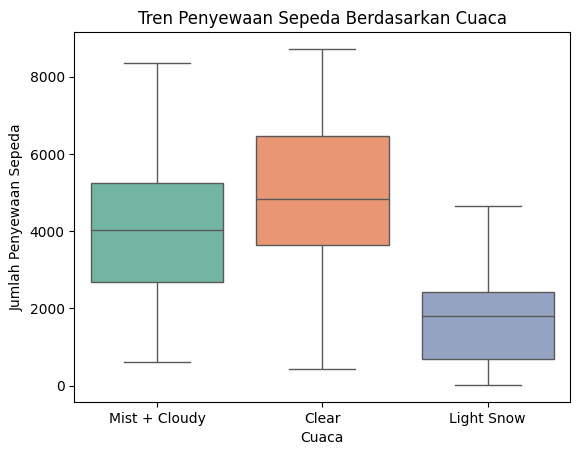

In [90]:
# Tren Pengaruh dari Cuaca
sns.boxplot(x = 'weathersit', y = "cnt", data = data_day, palette = "Set2")
plt.title("Tren Penyewaan Sepeda Berdasarkan Cuaca")
plt.xlabel("Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

<Figure size 1000x600 with 0 Axes>

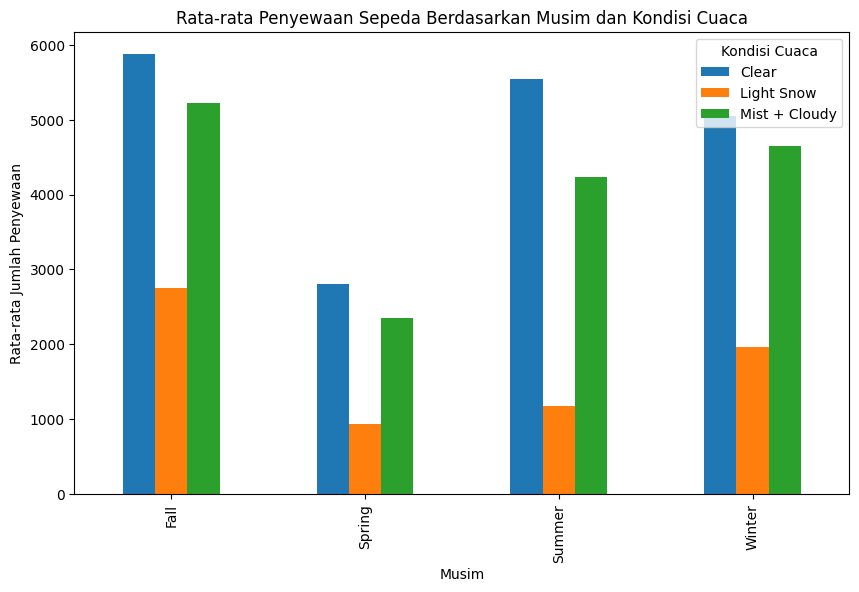

In [105]:
# Rata - rata penyewaan sepeda berdasarkan musim dan kondisi cuaca
trend = data_day.groupby(["season", "weathersit"])["cnt"].mean().unstack()

plt.figure(figsize=(10, 6))
trend.plot(kind="bar", figsize=(10, 6))
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim dan Kondisi Cuaca")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.legend(title="Kondisi Cuaca")
plt.show()

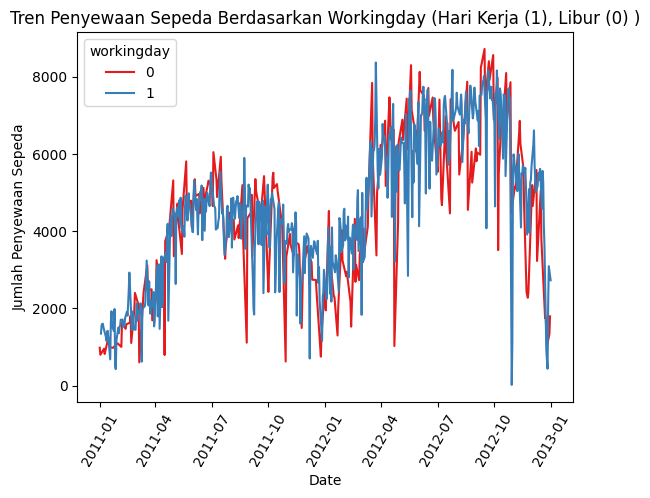

In [112]:
# Tren Pengaruh dari Workingday
sns.lineplot(x = 'dteday', y = "cnt", data = data_day, hue = 'workingday', palette = "Set1")
plt.title("Tren Penyewaan Sepeda Berdasarkan Workingday (Hari Kerja (1), Libur (0) )")
plt.xlabel("Date")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(rotation = 60)
plt.show()

**Insight:**
- `season` fall memiliki jumlah penyewaan sepeda paling banyak.
- ketika `wethersit` clear banyak penyewa sepeda daripada saaat cuacanya buruk.
- hari kerja memilki perbedaan dengan hari libur.

### Pertanyaan 2: Bagaimana penggunaan sepeda berdasarkan jam dalam sehari, apakah ada "golden hour" peminjaman sepeda?

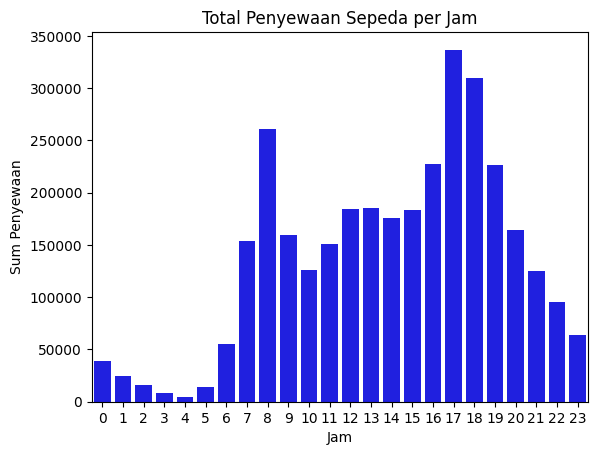

In [119]:
# Total Penyewaan Sepeda per Jam
sns.barplot(data = agg_hour, x = "hr", y = "sum_cnt", color = "blue")
plt.title("Total Penyewaan Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Sum Penyewaan")
plt.show()


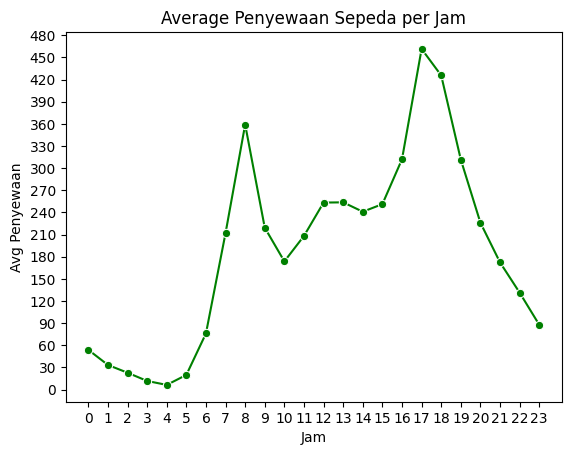

In [127]:
# Average Penyewaan Sepeda per Jam
sns.lineplot(data = agg_hour, x = "hr", y = "avg_cnt", marker="o", color = "green")
plt.title("Average Penyewaan Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Avg Penyewaan")
plt.xticks(range(0,24))
plt.yticks(range(0,500,30))
plt.show()

**Insight:**
- Melihat dari total penyewaan sepeda menunjukkan bahwa jam berangkat dan pulang kerja sangat diminati.
- Melihat dari rata - rata penyewaan sepeda juga menunjukkan hal sama dengan total penyewaan sepeda.
- Saran : memberikan lebih jumlah sepeda yang akan disewakan di berangkat dan pulang kerja.

## Analisis Lanjutan (Opsional)

### Pengelompokan jumlah penyewa regristered dan casual berdasarkan Bulan 

In [113]:
# Menghitung jumlah penyewa yang sudah registrasi atau belum
agg_reg = data_day.groupby("mnth")[["casual","registered"]].sum().reset_index()
agg_reg

,mnth,casual,registered
0,1,12042,122891
1,2,14963,136389
2,3,44444,184476
3,4,60802,208292
4,5,75285,256401
5,6,73906,272436
6,7,78157,266791
7,8,72039,279155
8,9,70323,275668
9,10,59760,262592


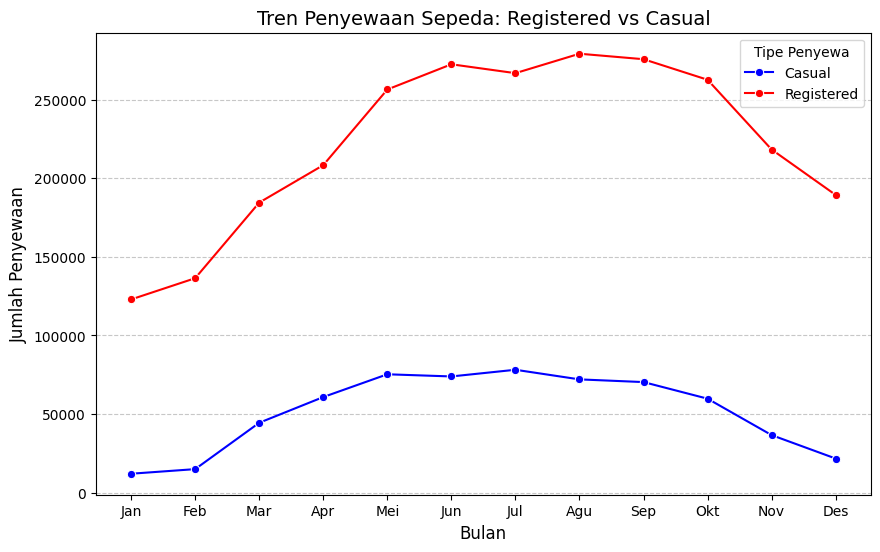

In [117]:
# Tren Penyeaan Sepeda berdasarkan bulan dari yang sudah registrasi dan belum
plt.figure(figsize=(10, 6))
sns.lineplot(x=agg_reg["mnth"], y=agg_reg["casual"], marker="o", label="Casual", color="blue")
sns.lineplot(x=agg_reg["mnth"], y=agg_reg["registered"], marker="o", label="Registered", color="red")
plt.title("Tren Penyewaan Sepeda: Registered vs Casual", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"
])
plt.legend(title="Tipe Penyewa")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Analisis ini akhirnya membantu kita dari `registered` memiliki jumlah penyewaan sepeda yang banyak dibandingkan `casual`.
- Bisa menjadikan ini sebagai promosi untuk yang sudah terdaftar agar bisa meningkatkan jumlahnya lagi.

## Conclusion

- Conclution pertanyaan 1 : Bagaimana tren peminjaman sepeda selama periode tertentu dengan faktor dari hari kerja / weekend dan cuaca serta musim?
    - `Season` memiliki terhadap peminjaman sepeda. `Musim Fall` adalah yang paling tinggi dan `Musim Spring` paling rendah.
    - `weathersit` juga memilki pengaruh terhadap peminjaman sepeda. Saat `Cuaca Clear` lebih banyak orang yang melakukan peminjaman sedangkan `Cuaca Light Snow` paling sedikit.
    - Hal ini juga ditunjukkan dari grafik `Season dan Weathersit Bar Chart` yang memberikan informasi bahwa adanya perbedaan dari masing" `Musim` dan `Cuaca`.
    - `workingday` juga memiliki pengaruh yang cukup signifikan.
- Conclution pertanyaan 2 : Bagaimana penggunaan sepeda berdasarkan jam dalam sehari, apakah ada "golden hour" peminjaman sepeda?
    - Melihat dari grafik yang menunjukkan `rata - rata` dan `total` penyewaan sepeda, waktu keberangkatan dan kepulangan kerja merupakan `Golden Hour` yang menjadi jam sibuk dari penyewaan.
    - Dengan ini bisa digunakan untuk peningkatan jumlah sepeda ketika `Golden Hour` atau bisa menjadi sarana `promosi harga`.
- Conclution Analisis Lanjutan : Pengelompokan jumlah penyewa regristered dan casual berdasarkan Bulan.
    - `registered` atau orang yang sudah mendaftar menunjukkan jumlah yang jauh lebih banyak dari `casual`.
    - Bisa dijadikan bahan promosi untuk yang sudah mendaftar dengan `membership` atau yang belum mendaftar dengan `promosi harga`.